Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1.     Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2.     Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3.    Train a simple classifier (e.g. any simple classifier in scikit) to recognize the MNIST digits using as inputs their encoding obtained at step 2. Use the standard training/test split. Show a performance metric of your choice in the presentation/handout.

In [1]:
import keras
import tensorflow
import matplotlib.pyplot as plt
import numpy as np

In [2]:

from keras.datasets import mnist

(Xtr, ytr), (Xts, yts) = mnist.load_data()
     

In [3]:
Xtr_flat = Xtr.reshape(Xtr.shape[0],-1)
Xts_flat = Xts.reshape(Xts.shape[0],-1)
print(Xts_flat[0,300:350])

#i was having exploding gradient, so i normalized in this way
Xts_flat = Xts_flat / 255
Xtr_flat = Xtr_flat / 255
print(Xts_flat[0,300:350])


[254 106   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  83 253 209  18   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[0.99607843 0.41568627 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.3254902  0.99215686 0.81960784 0.07058824
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [9]:
# RBM is composed by the nodes (hidden and visible) and the links between the nodes (the weights matrix) + bias
class RBM:
    def __init__(self, v_num, h_num):
        # number of visible variables
        self.v_num = v_num
        # number of hidden variables
        self.h_num = h_num
        # value of the weights
        self.weights = np.random.randn(v_num, h_num) * 0.1
        # bias
        self.v_bias = np.zeros(v_num)
        self.h_bias = np.zeros(h_num)

    def wake_phase(self, v_prob):
        # dot product between v_prob (which will be the data) and the weights, then add the bias
        h_activations = np.dot(v_prob, self.weights) + self.h_bias
        # compute activation
        h_probabilities = sigmoid(h_activations)
        return h_probabilities, np.random.binomial(1, h_probabilities)

    def dream_phase(self, h_prob):
        # dot product between h_prob and the transpose of the weights, then add the bias
        v_activations = np.dot(h_prob, self.weights.T) + self.v_bias
        # compute activation
        v_probabilities = sigmoid(v_activations)
        return v_probabilities, np.random.binomial(1, v_probabilities)

    # training cycle, inputs are: the dataset, the number of epochs, the batch size, the learning rate and the number of contrastive
    # divergence steps
    def train(self, data, num_epochs=10, batch_size=10, lr = 0.1, cd_steps = 1):

        num_examples = data.shape[0]

        for _ in range(num_epochs):
            # iterate starting from the first image on the entire dataset, moving the index according to batch_size
            for i in range(0, num_examples, batch_size):
                # i take 'batch_size' number of images
                batch = data[i:i + batch_size]

                # Contrastive divergence
                h_probabilities, positive_hidden = self.wake_phase(batch)
                for _ in range(cd_steps):
                    _, visible_states = self.dream_phase(positive_hidden)
                    hidden_prob, hidden_states = self.wake_phase(visible_states)

                # Update weights and biases
                visible_associations = np.dot(batch.T, h_probabilities)
                hidden_associations = np.dot(visible_states.T, hidden_states)

                # we try to reach equilibrium, so we want the difference to be closer as possible to zero
                self.weights += lr * ((visible_associations - hidden_associations) / batch_size)
                self.v_bias += lr * np.mean(batch - visible_states, axis=0)
                self.h_bias += lr * np.mean(h_probabilities - hidden_prob, axis=0)

    def generate(self, data, k=1):
        samples = np.copy(data)
        for i in range(len(samples)):
            visible = samples[i]
            for _ in range(k):  # Gibbs sampling steps
                hidden_prob, hidden = self.wake_phase(visible)
                visible_prob, visible = self.dream_phase(hidden)
            samples[i] = visible
        return samples

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
# from sklearn.metrics import mean_squared_error

# Initialize and train RBM
rbm = RBM(v_num=Xtr_flat.shape[1], h_num=300)
rbm.train(Xtr_flat, num_epochs=1,batch_size=64)

(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)
(64, 784)
(64, 300)


KeyboardInterrupt: 

C:\Users\Fede\AppData\Local\Temp\ipykernel_16580\1277780296.py:66: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


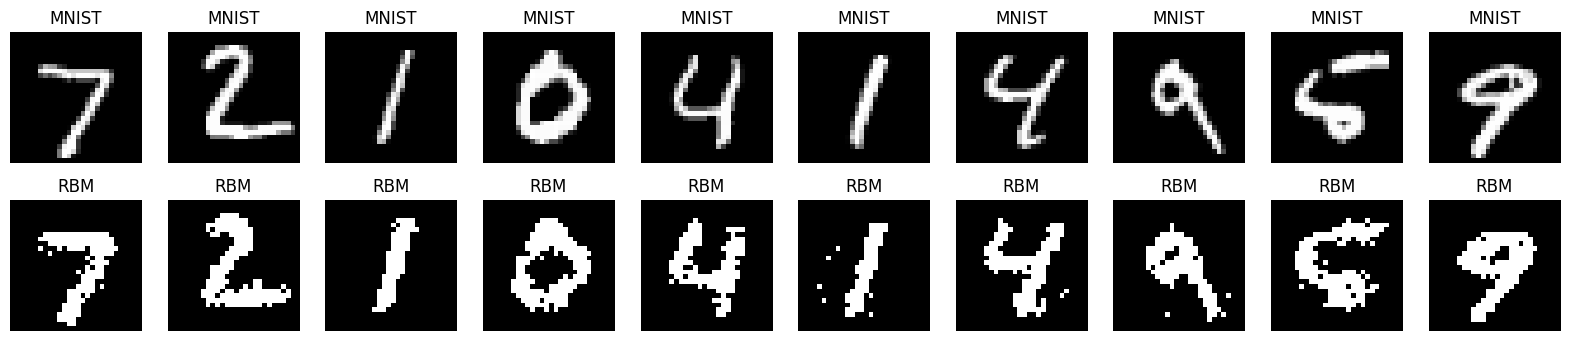

In [6]:
import numpy as np
import matplotlib.pyplot as plt

test_data = Xts.reshape(Xts.shape[0],-1)


def plot_images(original_images, reconstructed_images, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title("MNIST")
        plt.axis('off')

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.title("RBM")
        plt.axis('off')
    plt.show()

# Assuming test_data contains original images and visible_prob contains reconstructions
num_images_to_plot = 10  # Number of images you want to plot

visible_prob= rbm.generate(test_data[:num_images_to_plot], 1)

# Plot original and reconstructed images in cycles of 10, up to num_images_to_plot
for i in range(0, num_images_to_plot, 10):
    plot_images(test_data[i:i + 10], visible_prob[i:i + 10])

In [7]:
np.random.binomial(1, 0.1)

0

In [8]:
Xts_flat[0,300:350]

array([0.99607843, 0.41568627, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3254902 , 0.99215686, 0.81960784, 0.07058824,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])